# </center>MODELS 

*Testing models then used in the "src" files*

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor


### GET DATA 

In [129]:
# reading dataset using panda
data_path = os.path.dirname(os.getcwd())
data_df = pd.read_csv(os.path.join(data_path, "data\\data_income.csv"))
data_df = data_df.dropna()

In [4]:
data_df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [130]:
# Define the features and target
X = data_df.drop(["income"], axis=1)
y = data_df["income"]

# Define the categorical columns to one-hot encode
categorical_cols = [
    "occupation",
    "education",
    "workclass",
    "marital-status",
    "relationship",
    "race",
    "native-country",
    "gender",
]
numeric_cols = [
    "age",
    "fnlwgt",
    "educational-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]


In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## RANDOM FOREST

### OneHotEncoding

In [7]:
############## preprocessing & pipeline ##############

# Define preprocessing for categorical and numeric data
categorical_preprocessor = OneHotEncoder()
numeric_preprocessor = "passthrough"

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
        ("num", numeric_preprocessor, numeric_cols),
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Create a pipeline with preprocessing and the machine learning model
model = RandomForestClassifier(random_state=42)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])


In [8]:
######################## Train & Predict ########################

# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


### features importances

In [9]:
feature_importance = model.feature_importances_

# Combine the one-hot feature names with the numeric feature names
all_feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names, "Importance": feature_importance}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)


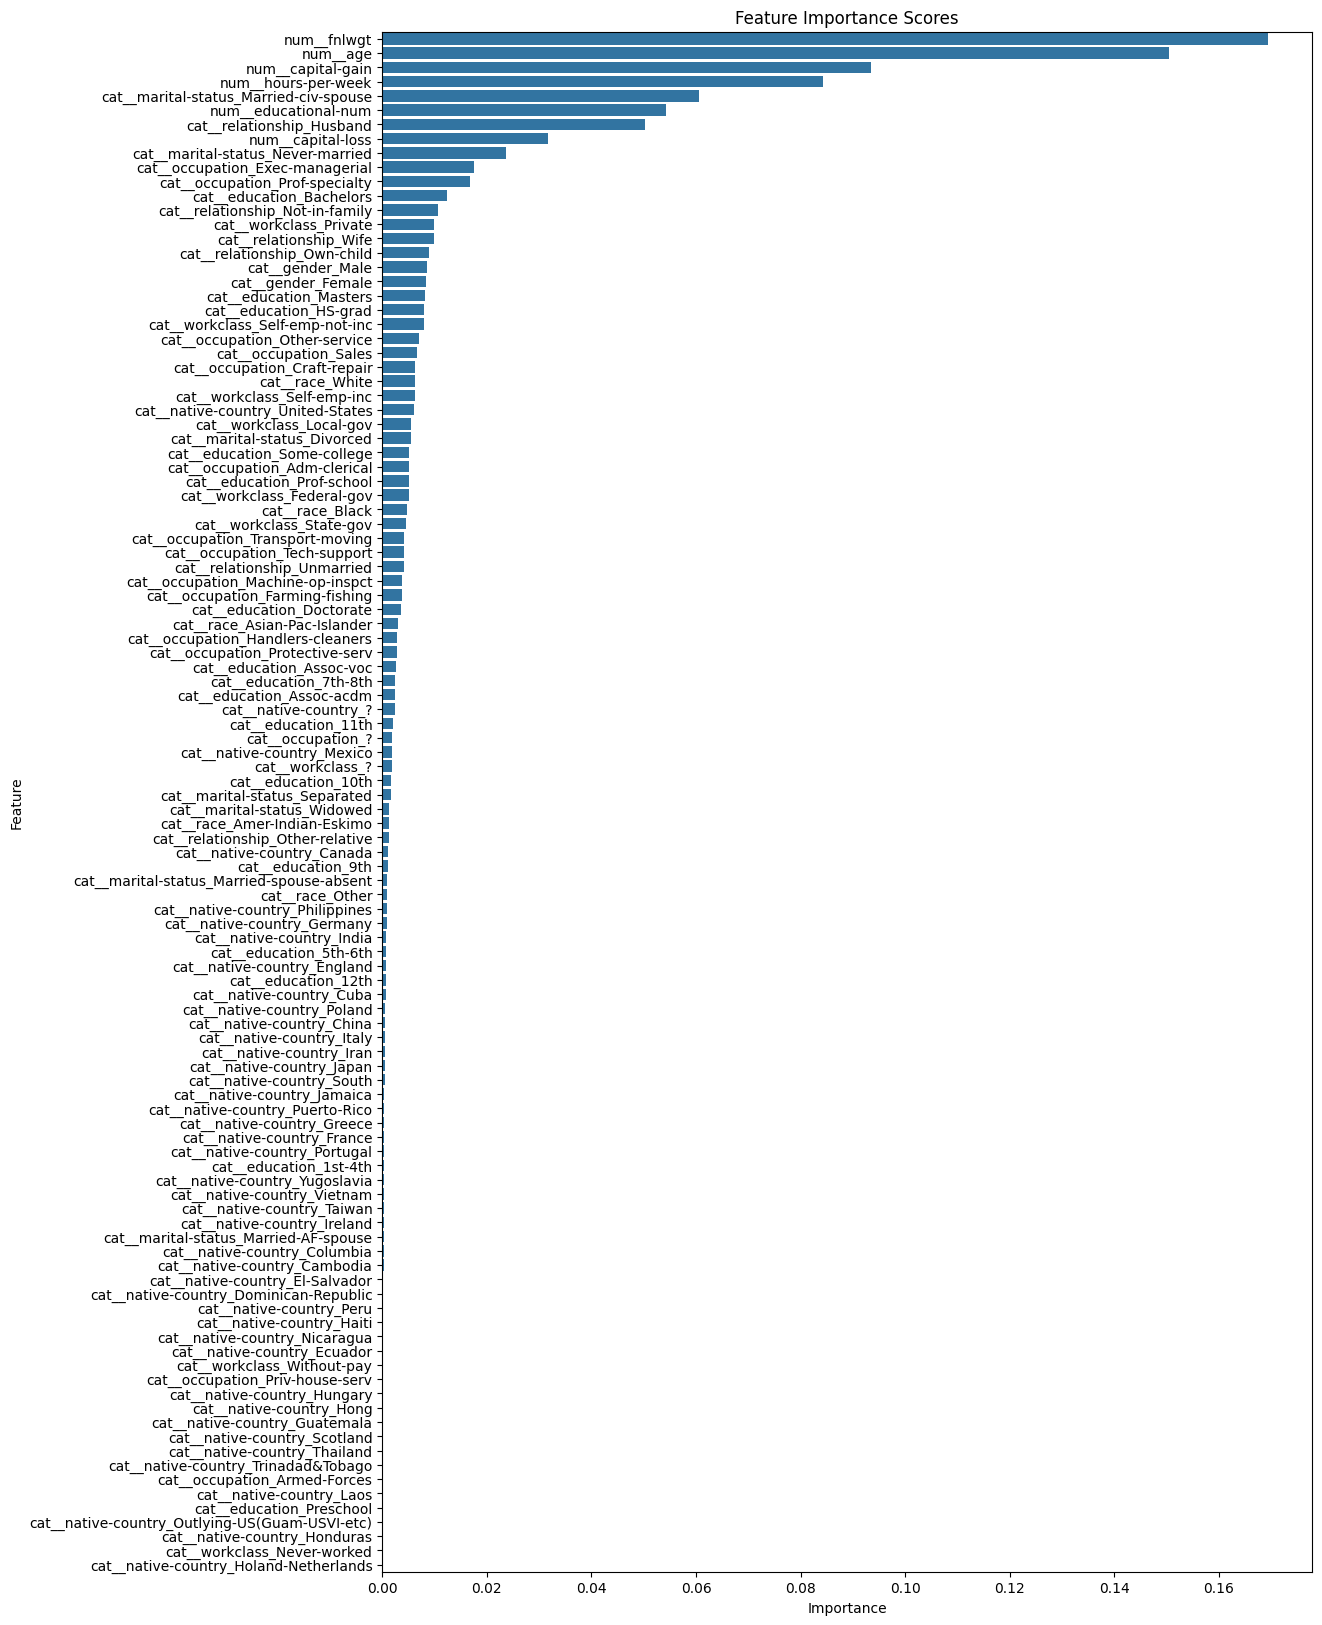

In [10]:
# Create a bar plot of feature importance
plt.figure(figsize=(12, 20))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


### Label Encoder

In [11]:
le = LabelEncoder()

X_train_le = X_train
X_test_le = X_test

# Apply LabelEncoder to the categorical columns
for col in categorical_cols:
    X_train_le[col] = le.fit_transform(X_train[col])
    X_test_le[col] = le.transform(X_test[col])

# Create a pipeline with preprocessing and the machine learning model
model = RandomForestClassifier(random_state=42)

# Fit the pipeline (including preprocessing) to the training data
model.fit(X_train_le, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test_le)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


### features importance

In [13]:
feature_importances = model.feature_importances_

# Combine the one-hot feature names with the numeric feature names
all_feature_names = X_train.columns  # categorical_cols + numeric_cols

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names, "Importance": feature_importances}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)


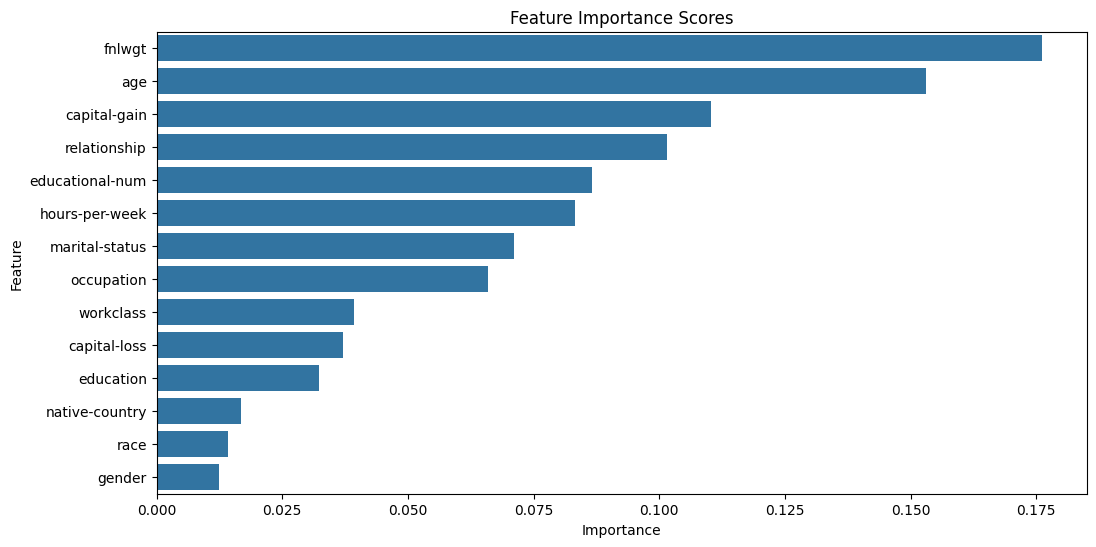

In [14]:
# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


## XGBoost

In [15]:
# fix the format for y
y_train_bin = y_train.replace({">50K": 1, "<=50K": 0})
y_test_bin = y_test.replace({">50K": 1, "<=50K": 0})


### Label Encoder

In [16]:
le = LabelEncoder()

# Apply LabelEncoder to the categorical columns
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Create a pipeline with preprocessing and the machine learning model
model = XGBClassifier(random_state=42)

# Fit the pipeline (including preprocessing) to the training data
model.fit(X_train, y_train_bin)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8759


### OneHot Encoder + Scaler

In [110]:
# Define preprocessing for categorical and numeric data
categorical_preprocessor = OneHotEncoder()
numeric_preprocessor = StandardScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
        ("num", numeric_preprocessor, numeric_cols),
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Create a pipeline with preprocessing and the machine learning model
xgb_model = XGBClassifier(random_state=42)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train_bin)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8775


### features importance

In [101]:
all_features = preprocessor.get_feature_names_out()
# Get the feature importances using the model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_features, "Importance": feature_importances}
)


In [102]:
###################  HANDLE THE ONEHOT ENCODED FEATURES ######################

# Extract the original categorical feature names and category names
data_type = [
    col.split("__")[0] for col in feature_importance_df["Feature"]
]
original_categorical_features = [col.split("_")[2]
                  for col in feature_importance_df["Feature"]]
category_names = [col.split("_")[-1]
                  for col in feature_importance_df["Feature"]]

# Add the original feature and category names as columns in the DataFrame
feature_importance_df["DataType"] = data_type
feature_importance_df["OriginalFeature"] = original_categorical_features
feature_importance_df["Category"] = category_names

# Group by the original categorical feature and category, calculate the mean of importances
agg_feature_importance = pd.DataFrame(columns=["mean", "Importance_sum"])
agg_feature_importance["mean"] = feature_importance_df.groupby(["OriginalFeature"])["Importance"].mean()
agg_feature_importance["Importance_sum"] = feature_importance_df.groupby(["OriginalFeature"])["Importance"].sum()
agg_feature_importance = agg_feature_importance.reset_index()


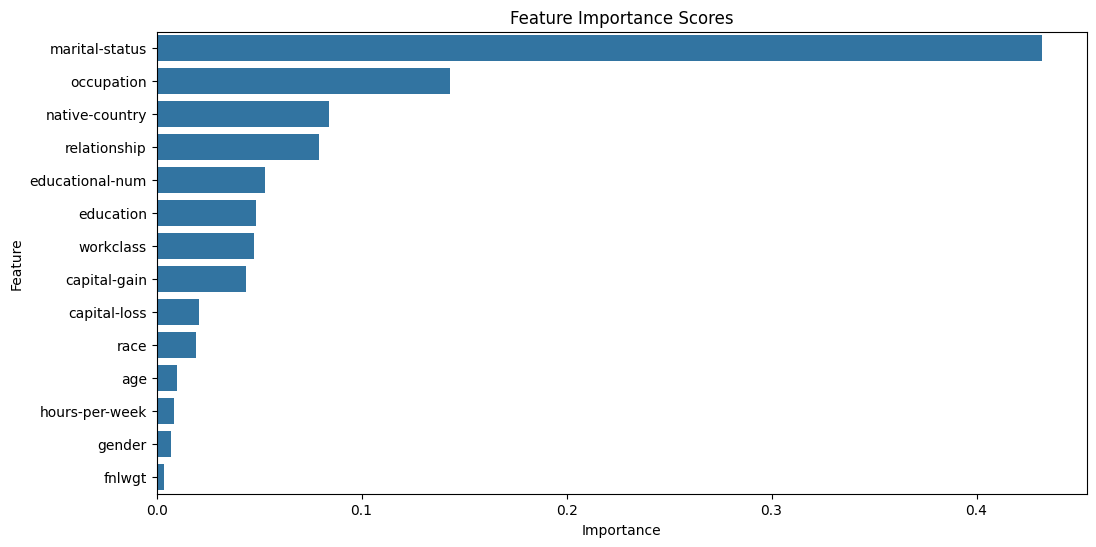

In [107]:
imp_plot = agg_feature_importance.sort_values(by="Importance_sum", ascending=False)

# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance_sum", y="OriginalFeature", data=imp_plot)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


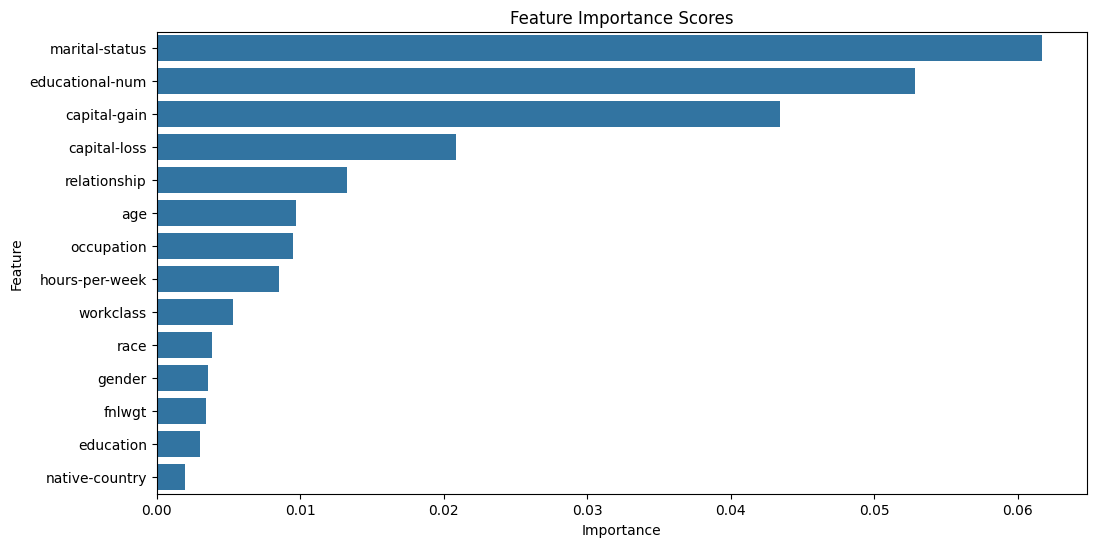

In [108]:
imp_plot = agg_feature_importance.sort_values(by="mean", ascending=False)

# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="mean", y="OriginalFeature", data=imp_plot)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


## LGBM

In [22]:
# Define preprocessing for categorical and numeric data
categorical_preprocessor = OneHotEncoder()
numeric_preprocessor = StandardScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
        ("num", numeric_preprocessor, numeric_cols),
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Create a pipeline with preprocessing and the machine learning model
regressor = LGBMRegressor(
    max_depth=25, n_estimators=150, learning_rate=0.3, num_leaves=25
)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train_bin)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8775


similar results than XGBoost but a little slower lets use XGBoost

### SURROGATE MODEL

In [125]:
X_train.size 

547022

In [132]:
X_train.size 

547022

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your XGBoost model (replace with your model loading code)
xgb_model = xgb.XGBClassifier()

pipeline = Pipeline([("preprocessor", preprocessor), ("model", xgb_model)])

# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train_bin)

# Get predictions from the XGBoost model
xgb_predictions = pipeline.predict(X_test)

# Create a dataset for the surrogate model
surrogate_data = pd.DataFrame({"XGB_Predictions": xgb_predictions})
surrogate_data = surrogate_data.join(X_test)  # Include selected features

# Choose a surrogate model (linear regression)
surrogate_model = LinearRegression()

# Train the surrogate model
surrogate_model.fit(
    surrogate_data.drop("XGB_Predictions",
                        axis=1), surrogate_data["XGB_Predictions"]
)

# Interpret the surrogate model (e.g., feature importance or coefficients)
surrogate_feature_importance = surrogate_model.coef_  # For linear regression

# Evaluate the surrogate model (optional)
surrogate_predictions = surrogate_model.predict(X_test)
r2 = r2_score(xgb_predictions, surrogate_predictions)
print(f"R-squared for surrogate model: {r2}")


ValueError: could not convert string to float: 'Private'